In [ ]:
import pandas as pd
fake_df=pd.read_csv('/content/Fake.csv')
true_df=pd.read_csv('/content/True.csv')
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
print("Missing values in fake dataset:")
print(fake_df.isnull().sum())
print("\nMissing values in true dataset:")
print(true_df.isnull().sum())


fake_df = fake_df.dropna(subset=['text'])
true_df = true_df.dropna(subset=['text'])


fake_df['title'] = fake_df['title'].fillna('Unknown')
fake_df['subject'] = fake_df['subject'].fillna('Unknown')
fake_df['date'] = fake_df['date'].fillna('Unknown')

true_df['title'] = true_df['title'].fillna('Unknown')
true_df['subject'] = true_df['subject'].fillna('Unknown')
true_df['date'] = true_df['date'].fillna('Unknown')
print("\nMissing values after handling:")
print("Fake dataset missing values:", fake_df.isnull().sum())
print("True dataset missing values:", true_df.isnull().sum())
print("\nFake dataset after handling missing values:")
print(fake_df.head())

print("\nTrue dataset after handling missing values:")
print(true_df.head())


Missing values in fake dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Missing values in true dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Missing values after handling:
Fake dataset missing values: title      0
text       0
subject    0
date       0
dtype: int64
True dataset missing values: title      0
text       0
subject    0
date       0
dtype: int64

Fake dataset after handling missing values:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Frida

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')


lemmatizer = WordNetLemmatizer()

fake_df = pd.read_csv("/content/Fake.csv")
true_df = pd.read_csv("/content/True.csv")

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    text = re.sub(r'http\S+|www\S+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\d+', '', text)
    words = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)

fake_df['text'] = fake_df['text'].apply(clean_text)
true_df['text'] = true_df['text'].apply(clean_text)

for column in ['title', 'subject', 'date']:
    fake_df[column] = fake_df[column].fillna("Unknown")
    true_df[column] = true_df[column].fillna("Unknown")
fake_df.to_csv("fake.csv", index=False)
true_df.to_csv("true.csv", index=False)

print("Datasets cleaned and saved to 'fake.csv' and 'true.csv'.")
print("Sample cleaned text from Fake News dataset:")
print(fake_df['text'].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Datasets cleaned and saved to 'fake.csv' and 'true.csv'.
Sample cleaned text from Fake News dataset:
0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object


In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

fake_tfidf = tfidf_vectorizer.fit_transform(fake_df['text'])
true_tfidf = tfidf_vectorizer.transform(true_df['text'])

fake_tfidf_df = pd.DataFrame(fake_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
true_tfidf_df = pd.DataFrame(true_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

fake_df = pd.concat([fake_df, fake_tfidf_df], axis=1)
true_df = pd.concat([true_df, true_tfidf_df], axis=1)

fake_df.to_csv("fake_with_tfidf.csv", index=False)
true_df.to_csv("true_with_tfidf.csv", index=False)

print("Sample cleaned text and features from Fake News dataset:")
print(fake_df[['title', 'text']].head())
print("\nSample TF-IDF features from Fake News dataset:")
print(fake_tfidf_df.head())


Sample cleaned text and features from Fake News dataset:
                                               title  title  \
0   Donald Trump Sends Out Embarrassing New Year’...    0.0   
1   Drunk Bragging Trump Staffer Started Russian ...    0.0   
2   Sheriff David Clarke Becomes An Internet Joke...    0.0   
3   Trump Is So Obsessed He Even Has Obama’s Name...    0.0   
4   Pope Francis Just Called Out Donald Trump Dur...    0.0   

                                                text  text  
0  donald trump wish american happy new year leav...   0.0  
1  house intelligence committee chairman devin nu...   0.0  
2  friday revealed former milwaukee sheriff david...   0.0  
3  christmas day donald trump announced would bac...   0.0  
4  pope francis used annual christmas day message...   0.0  

Sample TF-IDF features from Fake News dataset:
      aaron  abandoned  abbott  abc  abedin  ability  able  abortion  abroad  \
0  0.000000        0.0     0.0  0.0     0.0      0.0   0.0       0.0  

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.utils import resample
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()



def get_word_and_char_count(text):
    if pd.isnull(text):
        return 0, 0
    words = text.split()
    word_count = len(words)
    char_count = len(''.join(words))
    return word_count, char_count

fake_df[['word_count', 'char_count']] = fake_df['text'].apply(lambda x: pd.Series(get_word_and_char_count(x)))
true_df[['word_count', 'char_count']] = true_df['text'].apply(lambda x: pd.Series(get_word_and_char_count(x)))

def get_title_sentiment(title):
    if pd.isnull(title):
        return 0
    sentiment_score = sia.polarity_scores(title)['compound']
    return sentiment_score

fake_df['title_sentiment'] = fake_df['title'].apply(get_title_sentiment)
true_df['title_sentiment'] = true_df['title'].apply(get_title_sentiment)

fake_df.to_csv("fake_with_features.csv", index=False)
true_df.to_csv("true_with_features.csv", index=False)

print("Sample features from Fake News dataset:")
print(fake_df[['title', 'word_count', 'char_count', 'title_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sample features from Fake News dataset:
                                               title  word_count  char_count  \
0   Donald Trump Sends Out Embarrassing New Year’...         256        1533   
1   Drunk Bragging Trump Staffer Started Russian ...         178        1190   
2   Sheriff David Clarke Becomes An Internet Joke...         315        2031   
3   Trump Is So Obsessed He Even Has Obama’s Name...         243        1543   
4   Pope Francis Just Called Out Donald Trump Dur...         211        1216   

   title_sentiment  
0          -0.7096  
1          -0.3400  
2          -0.2960  
3          -0.2484  
4           0.0000  


In [ ]:
!pip install wordcloud
!pip install imbalanced-learn


In [ ]:
combined_df = pd.concat([fake_df[['text', 'title', 'word_count', 'char_count', 'title_sentiment']],
                         true_df[['text', 'title', 'word_count', 'char_count', 'title_sentiment']]],
                        ignore_index=True)

labels = [0] * len(fake_df) + [1] * len(true_df)

combined_df['label'] = labels

fake_count = len(fake_df)
true_count = len(true_df)
print(f"Fake News count: {fake_count}")
print(f"Real News count: {true_count}")

if fake_count != true_count:
    if fake_count < true_count:
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(combined_df[['word_count', 'char_count', 'title_sentiment']], combined_df['label'])
        print("SMOTE Applied: New class distribution:")
        print(pd.Series(y_resampled).value_counts())
    else:
        majority_class = combined_df[combined_df['label'] == 0]
        minority_class = combined_df[combined_df['label'] == 1]

        majority_class_downsampled = resample(majority_class,
                                              replace=False,
                                              n_samples=len(minority_class),
                                              random_state=42)

        balanced_df = pd.concat([majority_class_downsampled, minority_class])
        print("Undersampling Applied: New class distribution:")
        print(balanced_df['label'].value_counts())


Fake News count: 23481
Real News count: 21417
Undersampling Applied: New class distribution:
label
0    21417
1    21417
Name: count, dtype: int64


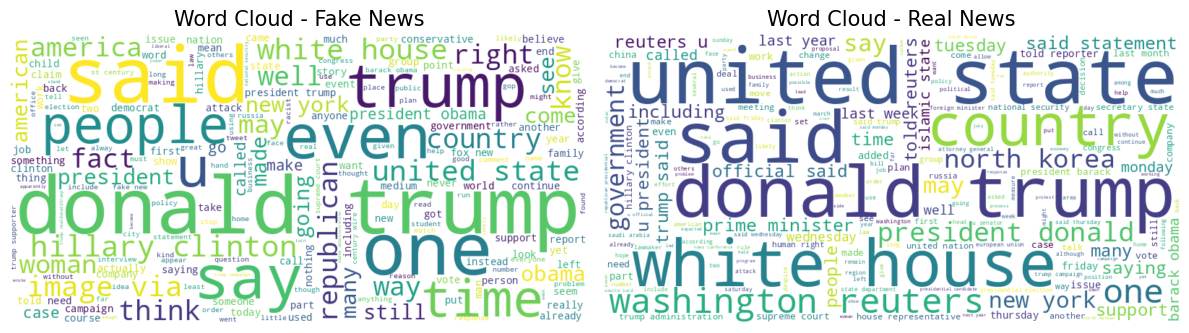

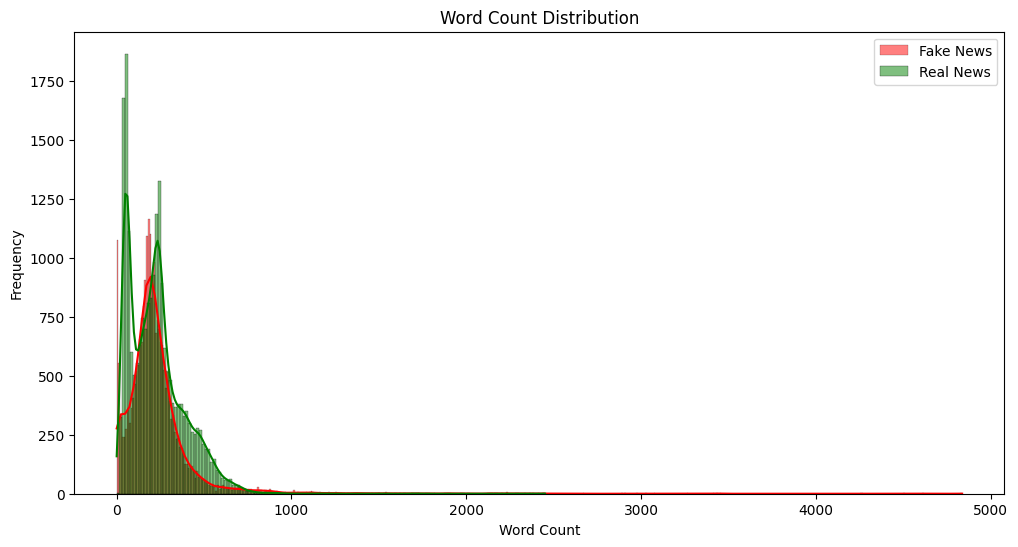

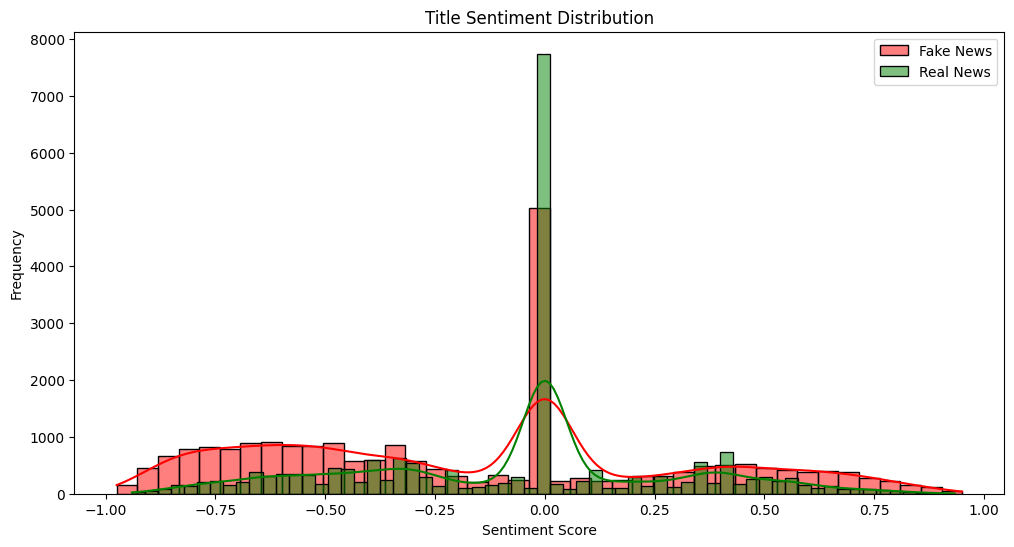

Fake News count: 23481
Real News count: 21417


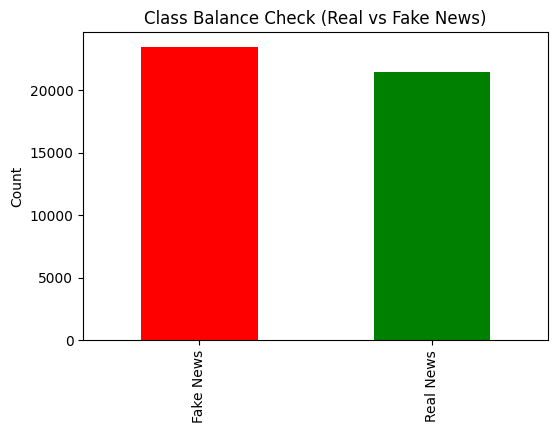

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

fake_text = ' '.join(fake_df['text'].dropna())
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

true_text = ' '.join(true_df['text'].dropna())
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News', fontsize=15)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud - Real News', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(fake_df['word_count'], kde=True, color='red', label='Fake News')
sns.histplot(true_df['word_count'], kde=True, color='green', label='Real News')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(fake_df['title_sentiment'], kde=True, color='red', label='Fake News')
sns.histplot(true_df['title_sentiment'], kde=True, color='green', label='Real News')
plt.title('Title Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

fake_count = len(fake_df)
true_count = len(true_df)
print(f"Fake News count: {fake_count}")
print(f"Real News count: {true_count}")

class_balance = pd.Series([fake_count, true_count], index=['Fake News', 'Real News'])
class_balance.plot(kind='bar', color=['red', 'green'], figsize=(6, 4))
plt.title('Class Balance Check (Real vs Fake News)')
plt.ylabel('Count')
plt.show()


In [ ]:
combined_df = pd.concat([fake_df[['text', 'title', 'word_count', 'char_count', 'title_sentiment']],
                         true_df[['text', 'title', 'word_count', 'char_count', 'title_sentiment']]],
                        ignore_index=True)

labels = [0] * len(fake_df) + [1] * len(true_df)

combined_df['label'] = labels

fake_count = len(fake_df)
true_count = len(true_df)
print(f"Fake News count: {fake_count}")
print(f"Real News count: {true_count}")

if fake_count != true_count:
    if fake_count < true_count:
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(combined_df[['word_count', 'char_count', 'title_sentiment']], combined_df['label'])
        print("SMOTE Applied: New class distribution:")
        print(pd.Series(y_resampled).value_counts())
    else:
        majority_class = combined_df[combined_df['label'] == 0]
        minority_class = combined_df[combined_df['label'] == 1]

        majority_class_downsampled = resample(majority_class,
                                              replace=False,
                                              n_samples=len(minority_class),
                                              random_state=42)

        balanced_df = pd.concat([majority_class_downsampled, minority_class])
        print("Undersampling Applied: New class distribution:")
        print(balanced_df['label'].value_counts())


Fake News count: 23481
Real News count: 21417
Undersampling Applied: New class distribution:
label
0    21417
1    21417
Name: count, dtype: int64


In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


fake_df['label'] = 0
true_df['label'] = 1

df = pd.concat([fake_df[['text', 'label']], true_df[['text', 'label']]], ignore_index=True)

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

logreg_model = pipeline.set_params(clf=LogisticRegression(max_iter=1000))
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

nb_pipeline = pipeline.set_params(clf=MultinomialNB())
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

rf_pipeline = pipeline.set_params(clf=RandomForestClassifier(random_state=42))
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

nb_param_grid = {'clf__alpha': [0.5, 1.0, 1.5, 2.0]}

nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)

print(f"Best Parameters for Naive Bayes: {nb_grid_search.best_params_}")

y_pred_nb_tuned = nb_grid_search.predict(X_test)

print("Naive Bayes (Tuned) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tuned)}")
print(classification_report(y_test, y_pred_nb_tuned))


Logistic Regression Results:
Accuracy: 0.9861915367483296
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Naive Bayes Results:
Accuracy: 0.9402004454342985
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4696
           1       0.92      0.95      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Random Forest Results:
Accuracy: 0.9878619153674832
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy          

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__max_depth': [10, 20, 30, None]
}

rf_random_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=5, cv=5, random_state=42)
rf_random_search.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {rf_random_search.best_params_}")
y_pred_rf_tuned = rf_random_search.predict(X_test)
print("Random Forest (Tuned) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned)}")
print(classification_report(y_test, y_pred_rf_tuned))


Best Parameters for Random Forest: {'clf__n_estimators': 150, 'clf__max_depth': None}
Random Forest (Tuned) Results:
Accuracy: 0.9883073496659243
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
!pip install matplotlib seaborn


Logistic Regression Accuracy: 0.9878619153674832
Naive Bayes Accuracy: 0.9435412026726058
Random Forest Accuracy: 0.9883073496659243

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4696
           1       0.93      0.96      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0

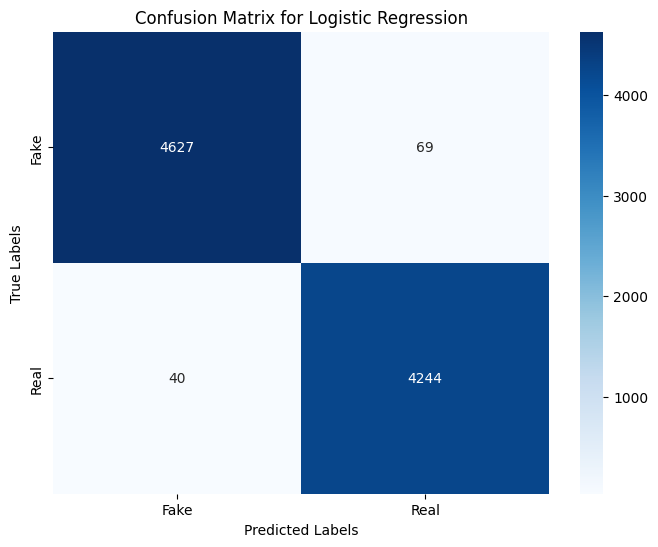

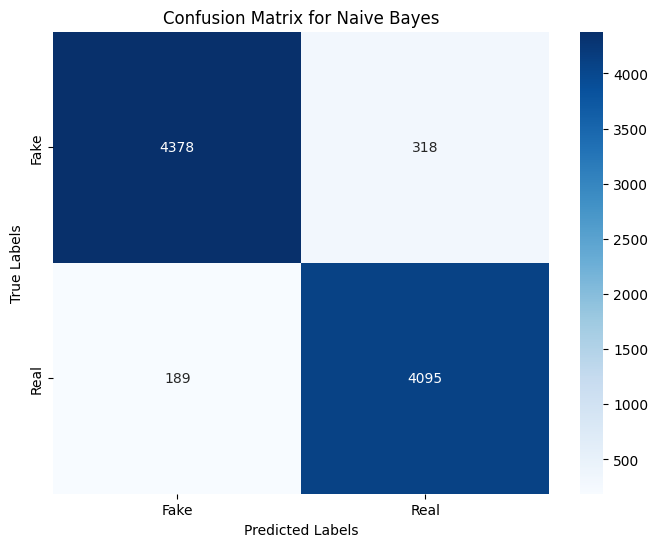

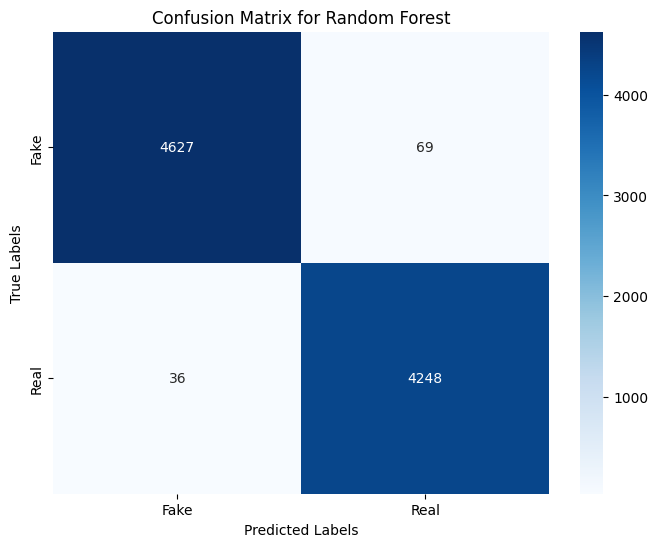

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

y_pred_logreg = logreg_model.predict(X_test)
y_pred_nb_tuned = nb_grid_search.predict(X_test)
y_pred_rf_tuned = rf_random_search.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb_tuned)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_tuned)}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_tuned))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

print(f"\nLogistic Regression ROC-AUC Score: {roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])}")
print(f"Naive Bayes ROC-AUC Score: {roc_auc_score(y_test, nb_grid_search.predict_proba(X_test)[:, 1])}")
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, rf_random_search.predict_proba(X_test)[:, 1])}")

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_nb_tuned, "Naive Bayes")
plot_confusion_matrix(y_test, y_pred_rf_tuned, "Random Forest")



Logistic Regression ROC-AUC Score: 0.9994
Naive Bayes ROC-AUC Score: 0.9856
Random Forest ROC-AUC Score: 0.9995


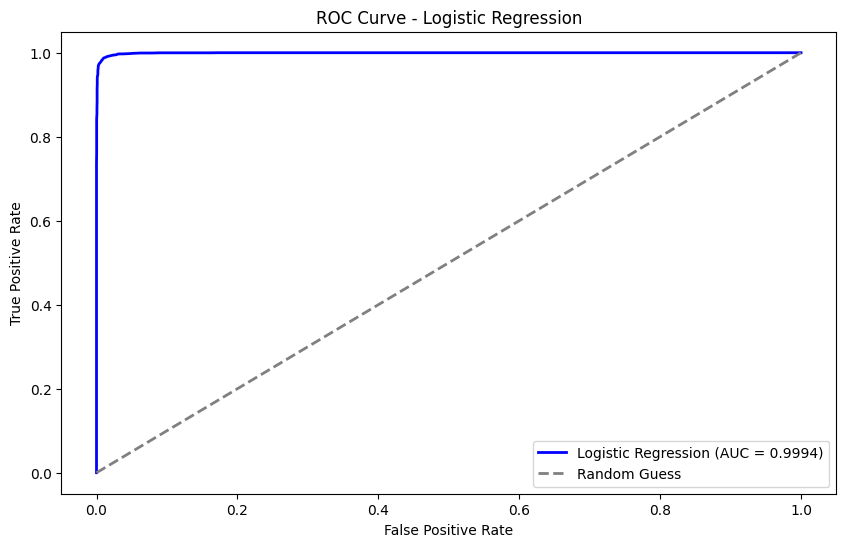

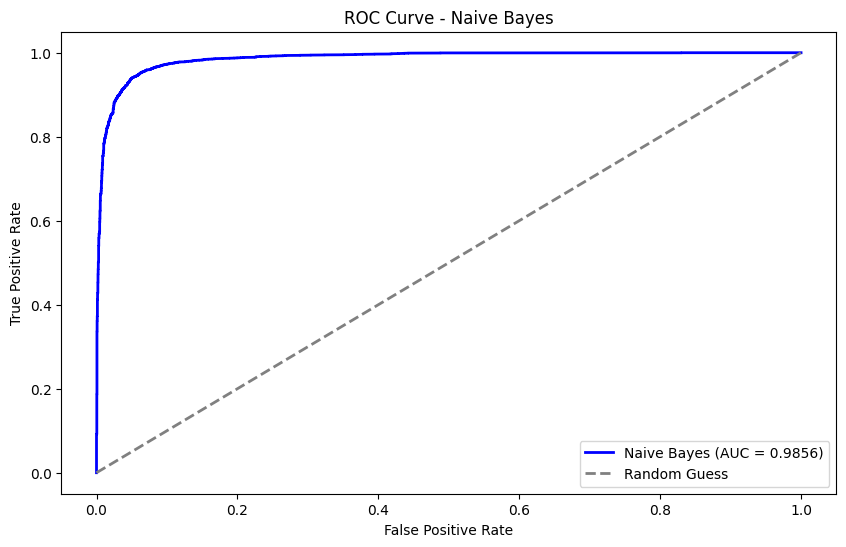

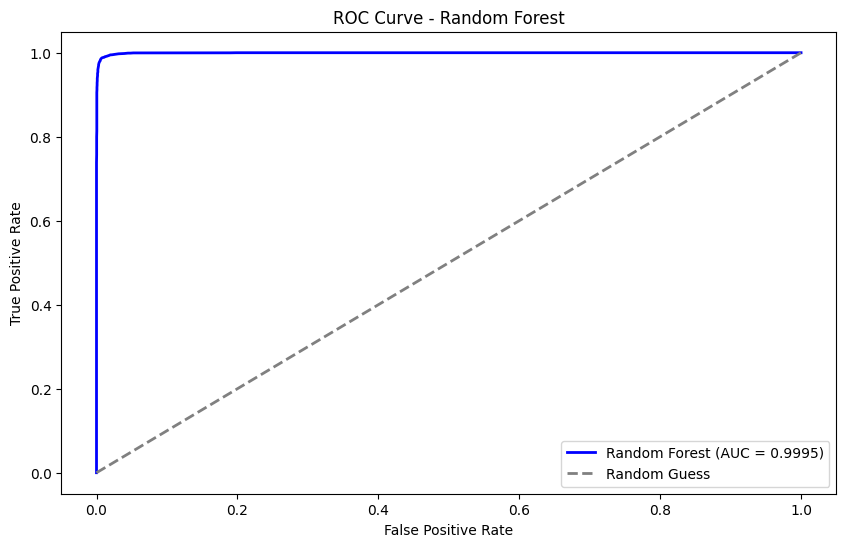

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc
)

print(f"\nLogistic Regression ROC-AUC Score: {roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]):.4f}")
print(f"Naive Bayes ROC-AUC Score: {roc_auc_score(y_test, nb_grid_search.predict_proba(X_test)[:, 1]):.4f}")
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, rf_random_search.predict_proba(X_test)[:, 1]):.4f}")

def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1], "Logistic Regression")
plot_roc_curve(y_test, nb_grid_search.predict_proba(X_test)[:, 1], "Naive Bayes")
plot_roc_curve(y_test, rf_random_search.predict_proba(X_test)[:, 1], "Random Forest")


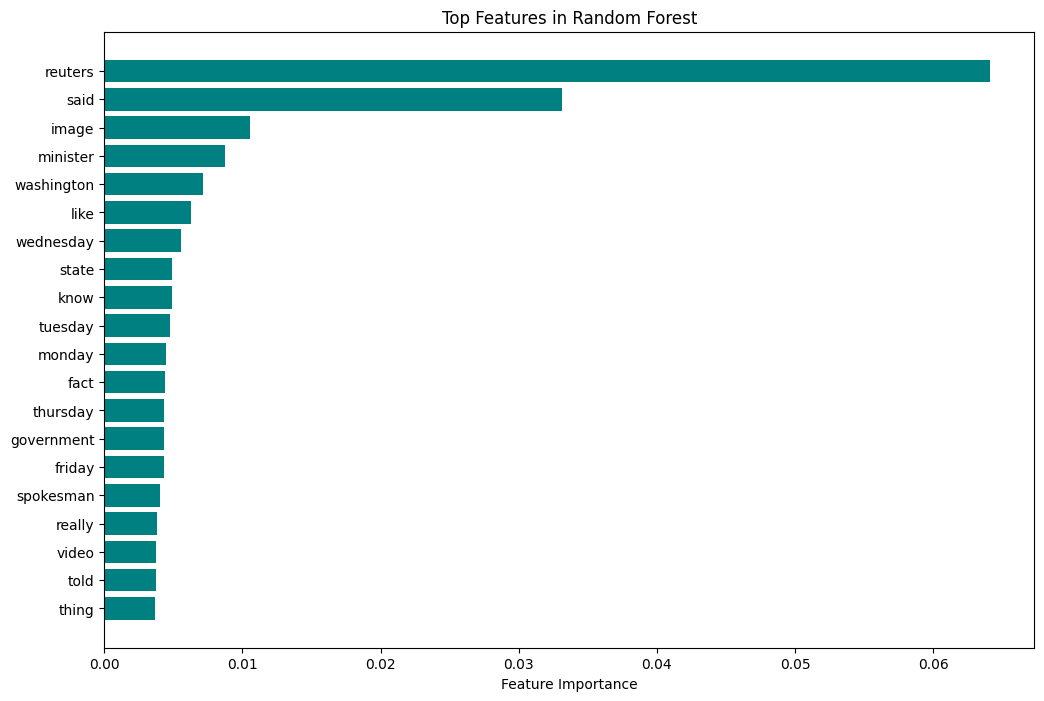

In [ ]:
def plot_feature_importance(model, vectorizer, top_n=20):
    importances = model.feature_importances_
    feature_names = vectorizer.get_feature_names_out()
    indices = np.argsort(importances)[-top_n:]

    plt.figure(figsize=(12, 8))
    plt.barh(range(top_n), importances[indices], align="center", color='teal')
    plt.yticks(range(top_n), [feature_names[i] for i in indices])
    plt.xlabel("Feature Importance")
    plt.title("Top Features in Random Forest")
    plt.show()

vectorizer = rf_random_search.best_estimator_.named_steps['tfidf']
classifier = rf_random_search.best_estimator_.named_steps['clf']
plot_feature_importance(classifier, vectorizer)
